In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

!rm ~/.cache/matplotlib -rf

#이후 런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 8s (1,149 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155219 files and d

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
pd.set_option("display.max_row", 100)
pd.set_option("display.max_column", 100)

In [2]:
import warnings   
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.unicode_minus'] = False

In [3]:
cd /content/drive/MyDrive/신용카드 연체 예측

/content/drive/.shortcut-targets-by-id/1jnpaEOqSw5oAaH3K0Y64phHRuEhQqFZt/신용카드 연체 예측


In [4]:
df = pd.read_csv("yj_final_df.csv")
df.head()

,Unnamed: 0,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,chi-fam,occyp_type_le,house_type_le,family_type_le,income_type_le,edu_type_le,Age,career_year,career_start_age,card_count,credit_change_count
0,0,17940,1,1,0,0,382500.0,Working,Higher education,Civil marriage,House / apartment,11153,1281,1,1,0,Accountants,2.0,60.0,2.0,-2.0,0,1,0,4,2,30,4.0,26.0,1,1
1,1,20390,1,0,1,1,67500.0,Working,Secondary / secondary special,Married,With parents,15964,385,0,0,0,Sales staff,3.0,60.0,2.0,-2.0,15,5,1,4,0,43,2.0,41.0,1,1
2,2,24612,1,0,1,3,180000.0,State servant,Higher education,Married,House / apartment,11627,1449,1,0,0,NaN,5.0,60.0,2.0,-2.0,12,1,1,2,2,31,4.0,27.0,1,1
3,3,17577,0,1,0,3,360000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15262,1674,0,0,0,Managers,5.0,60.0,2.0,-2.0,10,1,1,0,0,41,5.0,36.0,1,1
4,4,18174,1,0,0,1,225000.0,Working,Secondary / secondary special,Separated,House / apartment,11509,3506,0,0,0,Laborers,2.0,60.0,2.0,-1.0,8,1,2,4,0,31,10.0,21.0,1,1


In [5]:
df.drop(columns=['Unnamed: 0','index','income_type','edu_type','family_type','house_type','occyp_type'], inplace=True)

In [47]:
feature_columns = list(df.columns.difference(['credit','DAYS_BIRTH','DAYS_EMPLOYED']))
feature_columns

['Age',
 'begin_month',
 'car',
 'card_count',
 'career_start_age',
 'career_year',
 'chi-fam',
 'child_num',
 'credit_change_count',
 'edu_type_le',
 'email',
 'family_size',
 'family_type_le',
 'gender',
 'house_type_le',
 'income_total',
 'income_type_le',
 'occyp_type_le',
 'phone',
 'reality',
 'work_phone']

In [48]:
train=df.loc[:,feature_columns]

In [49]:
X = train.loc[:,feature_columns].values
Y = df.loc[:,'credit'].values

In [56]:
from sklearn.feature_selection import SelectFromModel #SelectFromModel import
from sklearn.linear_model import LinearRegression

selector_Randfo = SelectFromModel(estimator=LGBMClassifier()).fit(X, Y) #estimator 여기에 사용하고 싶은 모델 넣기

In [57]:
selector_Randfo_feat= train.columns[selector_Randfo.get_support()] #뽑힌 column
selector_Randfo_feat

Index(['Age', 'begin_month', 'card_count', 'career_start_age', 'career_year',
       'income_total', 'occyp_type_le'],
      dtype='object')

In [62]:
# VIF를 통한 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train[selector_Randfo_feat].values, i) for i in range(train[selector_Randfo_feat].shape[1])]
vif["features"] = selector_Randfo_feat 
vif

# Age, career_start_age, career_year 

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,inf,Age
1,2.556210,begin_month
2,2.589701,card_count
3,inf,career_start_age
4,inf,career_year
5,3.728961,income_total
6,5.275070,occyp_type_le


In [63]:
selector_Randfo_feat_list = selector_Randfo_feat.tolist()
selector_Randfo_feat_list.append('credit')

In [65]:
train['credit'] = Y

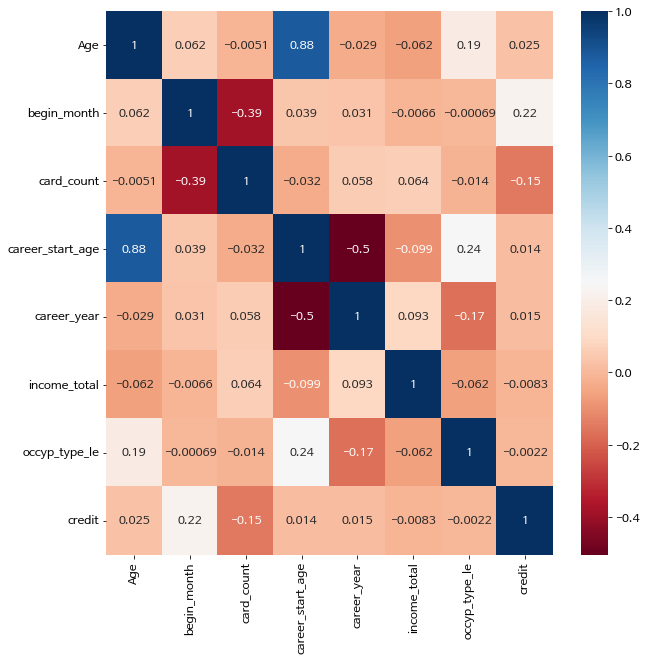

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(train[selector_Randfo_feat_list].corr(),cmap='RdBu',annot=True)

In [68]:
X = train[selector_Randfo_feat]

In [69]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

variables = X.columns.tolist()
X_train = X.copy()

In [72]:
col = selector_Randfo_feat
model_boston1 = sm.OLS(Y, train[col])
result_boston1 = model_boston1.fit()
print(result_boston1.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.795
Model:                            OLS   Adj. R-squared (uncentered):              0.795
Method:                 Least Squares   F-statistic:                              5646.
Date:                Wed, 10 Nov 2021   Prob (F-statistic):                        0.00
Time:                        07:41:52   Log-Likelihood:                         -9788.8
No. Observations:                8759   AIC:                                  1.959e+04
Df Residuals:                    8753   BIC:                                  1.963e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [ ]:
## 전진 선택법
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0

while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = X_train[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y, X.astype(float)).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y, sm.add_constant(X_train[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [ ]:
selected_variables

# TRY

In [16]:
from sklearn.cluster import KMeans
wcss = []

In [17]:
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

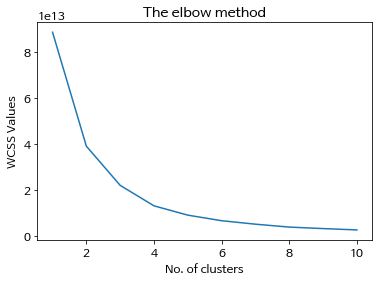

In [18]:
plt.plot(range(1,11), wcss)
plt.title("The elbow method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS Values")
plt.show()

# 기울기가 급격히 떨어지는 4개로 군집갯수 설정

In [22]:
kmeansmodel = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)

In [23]:
y_kmeans = kmeansmodel.fit_predict(X)

Text(0.5, 1.0, 'Clusters of customers')

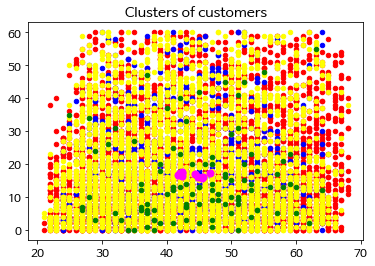

In [27]:
plt.scatter(X[y_kmeans == 0,0] , X[y_kmeans == 0,1], s = 20, c='red', label = 'Customer 1')
plt.scatter(X[y_kmeans == 1,0] , X[y_kmeans == 1,1], s = 20, c='blue', label = 'Customer 2')
plt.scatter(X[y_kmeans == 2,0] , X[y_kmeans == 2,1], s = 20, c='yellow', label = 'Customer 3')
plt.scatter(X[y_kmeans == 3,0] , X[y_kmeans == 3,1], s = 20, c='green', label = 'Customer 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=50, c= 'magenta', label = 'Centroids')

plt.title('Clusters of customers')

In [ ]:
centers = km.cluster_centers_
print(centers)

[[ 4.21859810e+01  1.55798348e+04  2.35367876e+03  1.70172596e+01
   4.82916520e-01  3.26981331e+00  3.52884819e+01  6.89749912e+00
  -1.75202536e+00  4.24092990e-01  1.42514970e+00  7.59774569e-01
   1.17294822e-01  2.17576611e+00  1.38499472e+00  5.40683339e-01
   1.26664318e+00  2.58244650e+05  2.29376541e+00  8.76224023e+00
   2.89186333e-01  6.78407890e-01  2.00422684e-01]
 [ 4.37270327e+01  1.61453733e+04  1.93381345e+03  1.69741288e+01
   2.98486448e-01  2.88789159e+00  3.80329109e+01  5.69412179e+00
  -1.76170363e+00  4.18866596e-01  1.36149243e+00  4.20802534e-01
   7.18057022e-02  2.18057022e+00  1.38190778e+00  7.17705033e-01
   1.28282295e+00  1.28064750e+05  2.45987328e+00  9.41059486e+00
   2.86166843e-01  6.65962689e-01  2.28088701e-01]
 [ 4.50756303e+01  1.66347647e+04  2.44532353e+03  1.59747899e+01
   6.55462185e-01  3.21428571e+00  3.79201681e+01  7.15546218e+00
  -1.78571429e+00  5.42016807e-01  1.33193277e+00  1.24369748e+00
   1.72268908e-01  2.32773109e+00  1.298

In [ ]:
https://todayisbetterthanyesterday.tistory.com/60